# Cloning quasars.
Let's look at the redshift distributions of the quasars in the Sloan Digital Sky Survey.

The Sloan Digital Sky Survey or SDSS is a major multi-spectral imaging and spectroscopic redshift survey using a dedicated 2.5-m wide-angle optical telescope at Apache Point Observatory in New Mexico, United States. Operations started in 1998.

In phase 1, SDSS has released photometry data 357 million (!!!) unique sources and 1.6 million spectra. In phase 2, SDSS observed the same patch of the sky many times ("time domain astronomy", and now we're going to have LSST!)

Download the SDSS quasar data:
- Upsample this distribution in hopefully two ways (but at least one of them), using both rejection sampling and inverse transform.
- Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)
- Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data. Does that agree with your expectation?

In [1]:
import numpy as np 
from astroML.datasets import fetch_dr7_quasar
from matplotlib import pyplot as plt

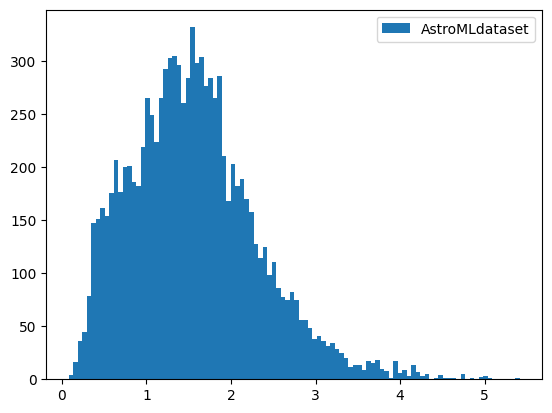

In [10]:
# Load redshift data from SDSS quasar sample
data = fetch_dr7_quasar()
data = data[:10000] #Select the first 10000 points
z = data['redshift']
n_bins=100 #Number of bins

plt.hist(z, n_bins, label="AstroMLdataset")
plt.legend()
plt.show()


## Rejection Sampling

In [3]:
# Function to perform rejection sampling
def rejection(val, bin, N):
    x=np.random.uniform(min(bin), max(bin), N)  # Generate N random x values uniformly across the bin range
    y=np.random.uniform(min(val), max(val), N)
    x_accepted = [] 
    y_accepted = []
    for i in range(N):
        bin_index = np.digitize(x[i], bin) - 1  # Find the corresponding bin for x[i]
        if y[i] < val[bin_index]:  # Accept the sample if y[i] is below the histogram height at that bin
            x_accepted.append(x[i]) 
            y_accepted.append(y[i])

    return x_accepted, y_accepted

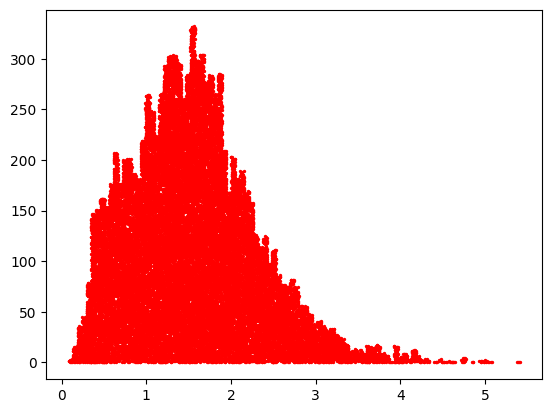

In [11]:
N=100000 #Number of uniformly generated numbers
values, bins =np.histogram(z,n_bins) #values: number of elements in each bin,  bins: edges of the bins
x_accepted, y_accepted= rejection(values, bins, N)
plt.scatter(x_accepted,y_accepted, color='red', s=2, marker='o')
plt.show()

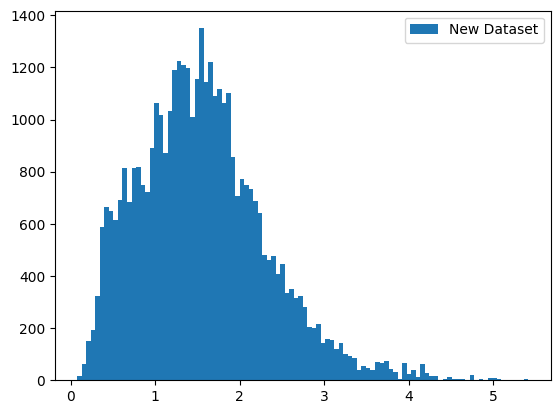

In [12]:
new_data=np.concatenate([z,x_accepted])
# Combine original and sampled data
plt.hist(new_data, n_bins, label="New Dataset")
plt.legend()
plt.show()

## Inverse transform Sampling

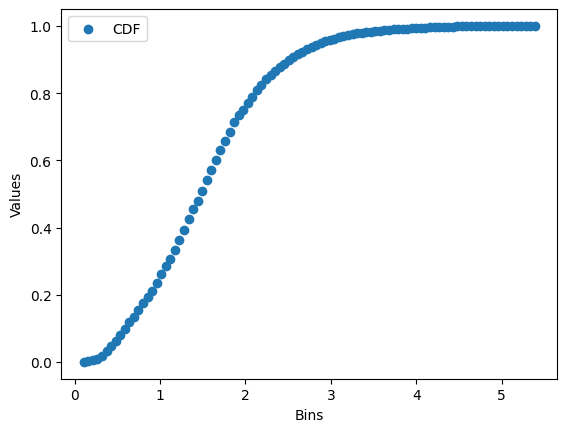

In [13]:
values, bins =np.histogram(z,n_bins)
somma=np.sum(values)
values=values/somma
cdf=np.cumsum(values) # Compute the cumulative distribution function (CDF)
# 'bins' are the edges of intervals, but counts refer to intervals themselves.
# To plot or interpolate correctly, we use the center of each bin as its x-coordinate.
bin_center=((bins[:-1]+ bins[1:])/2)
plt.scatter( bin_center, cdf, label="CDF")
plt.xlabel("Bins")
plt.ylabel("Values")
plt.legend()
plt.show()

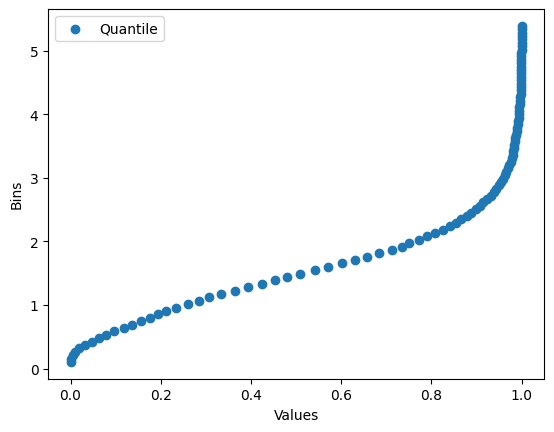

In [14]:
x_quantile=cdf
y_quantile= bin_center
# Plot quantile function (inverse CDF),  I simply inverted x and y of the points 
plt.scatter( x_quantile, y_quantile, label="Quantile")
plt.xlabel("Values")
plt.ylabel("Bins")
plt.legend()
plt.show()

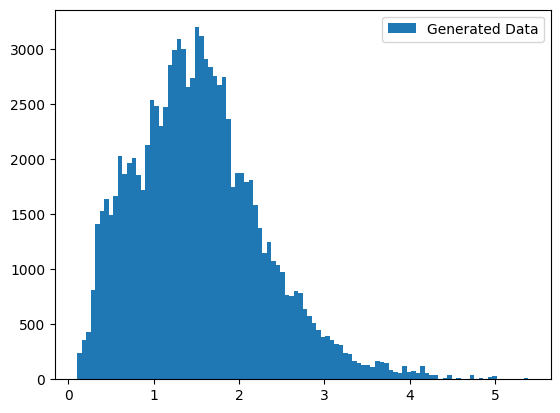

In [15]:
num=np.random.uniform(0,1,N)
# Use interpolation to invert CDF and get samples distributed like original data
y=np.interp(num,x_quantile, y_quantile)
plt.hist(y, n_bins, label="Generated Data")
plt.plot()
plt.legend()

[]

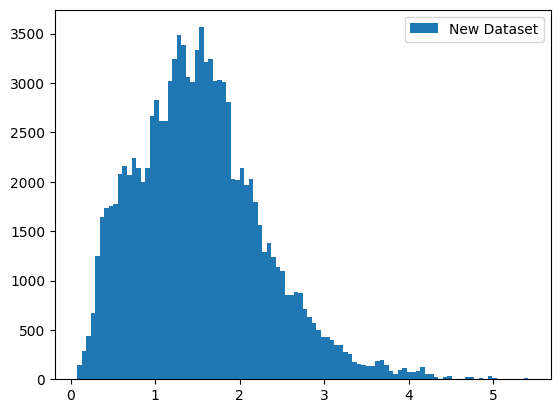

In [16]:
# Combine original and generated samples
new_data1=np.concatenate([z,y])
plt.hist(new_data1, n_bins, label="New Dataset")
plt.legend()
plt.plot()

[]

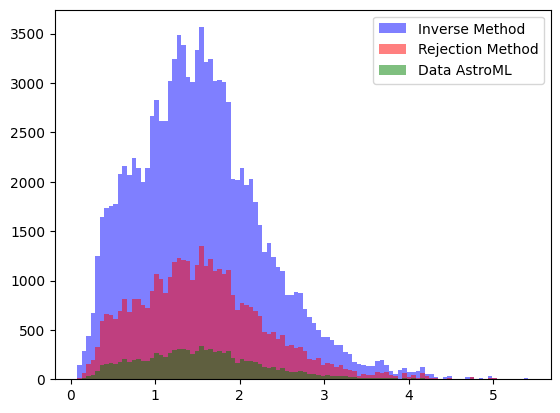

In [17]:
plt.hist(new_data1, n_bins, label="Inverse Method", color="Blue", alpha=0.5)
plt.hist(new_data, n_bins, label="Rejection Method", color="Red", alpha=0.5)
plt.hist(z,n_bins, color="green", label="Data AstroML", alpha=0.5)
plt.legend()
plt.plot()